In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

In [7]:
import psycopg2

# Establish connection to PostgreSQL database
conn = psycopg2.connect(database="Event_Feedback", user="postgres", password="hdd@183116", host="localhost")

# Execute SQL query and load data into pandas dataframe
df = pd.read_sql_query("SELECT * FROM event_data;", conn)

# Close database connection
conn.close()

# Display dataframe
df=df.drop(df.columns[[0]], axis=1)
df

C:\Users\shupe\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Rebook Rating,Overall City Value,Overall Meeting Value,Ease of Business,Cleanliness,Entertainment / Attractions,Shopping,Overall Attendance,International Attendance
0,1.0,5.0,3.0,5.0,4.0,4.0,3.0,4.0,4.0
1,0.0,3.0,3.0,3.0,3.0,4.0,3.0,1.0,1.0
2,0.0,4.0,5.0,3.0,4.0,5.0,3.0,2.0,2.0
3,0.0,4.0,4.0,4.0,3.0,3.0,2.0,4.0,3.0
4,1.0,5.0,5.0,4.0,5.0,4.0,3.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...
82,0.0,3.0,3.0,4.0,1.0,3.0,2.0,4.0,4.0
83,1.0,5.0,4.0,5.0,3.0,4.0,3.0,2.0,2.0
84,1.0,3.0,3.0,5.0,2.0,2.0,1.0,3.0,3.0
85,1.0,5.0,5.0,5.0,1.0,5.0,3.0,3.0,3.0


In [4]:
X = df.drop(['Rebook Rating'], axis=1)
y = df['Rebook Rating']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
# fit the model
model = LogisticRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.78


In [36]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

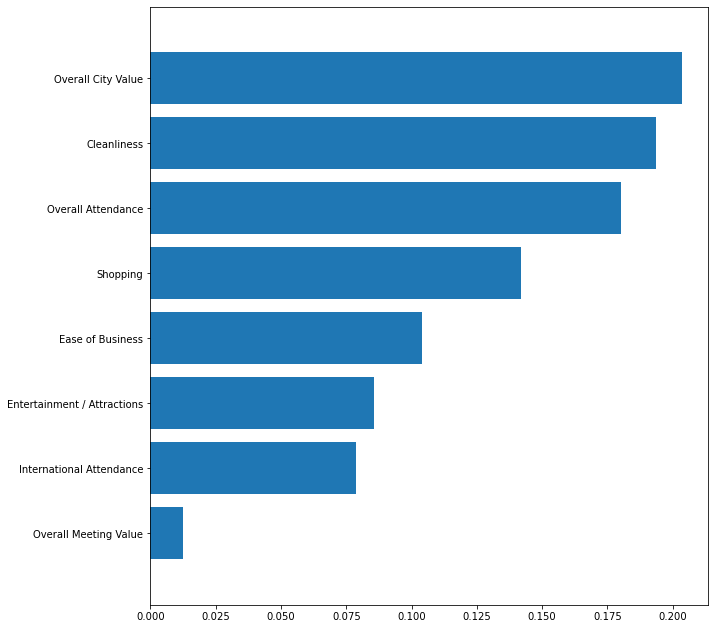

In [18]:
features = sorted(zip(X.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,11)
plt.margins(y=0.09)

ax.barh(y=cols, width=width)

plt.savefig('../Resources/DecisionTreeClassifier.png')
plt.show()

In [66]:
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(DecisionTreeClassifier(), max_features=3)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.78


In [21]:
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_

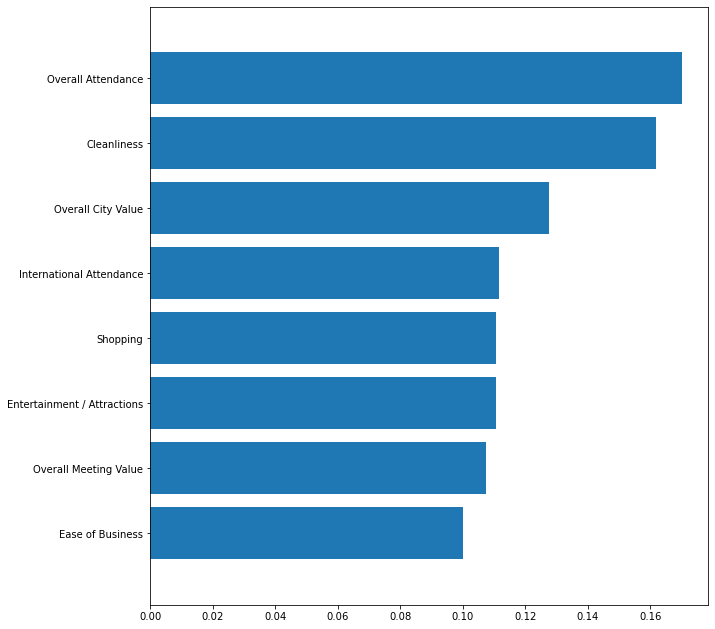

In [22]:
features = sorted(zip(X.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,11)
plt.margins(y=0.09)

ax.barh(y=cols, width=width)

plt.savefig('../Resources/RandomForestClassifier.png')
plt.show()

In [55]:
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestClassifier(), max_features=3)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 61.11


In [23]:
model = XGBClassifier()
model.fit(X, y)
importance = model.feature_importances_

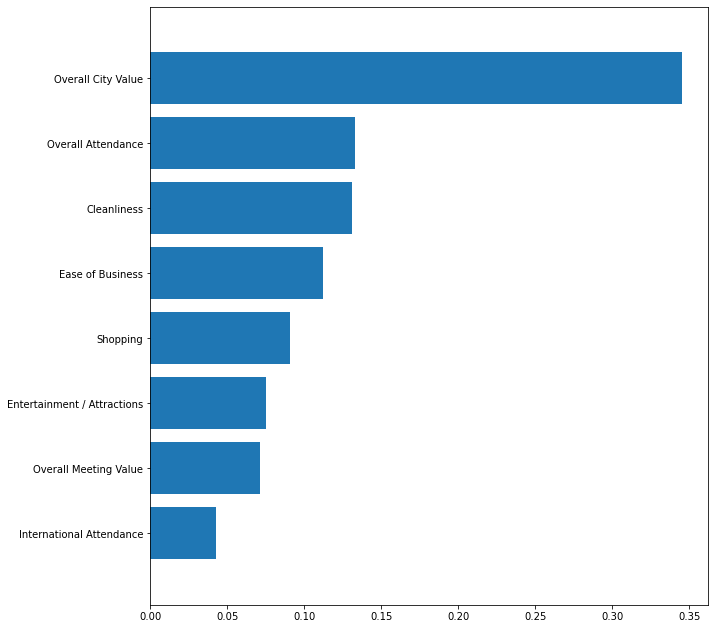

In [25]:
features = sorted(zip(X.columns, model.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,11)
plt.margins(y=0.09)

ax.barh(y=cols, width=width)

plt.savefig('../Resources/XGBoostClassifier.png')
plt.show()

In [67]:
def select_features(X_train, y_train, X_test):
    # configure to select a subset of features
    fs = SelectFromModel(XGBClassifier(), max_features=6)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression()
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 77.78
